Exam Marks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("MIDMARKS.xlsx", sheet_name='SEM2 MID 1 - ALPHA')
df = df.drop(columns="S.NO")
df.rename(columns={'M-II': 'M'}, inplace=True)
subject_columns = ['DV', 'M', 'PP', 'BEEE', 'FL', 'FIMS']
df[subject_columns] = df[subject_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df = df[(df != 0).any(axis=1)] 
df = df.iloc[:-1] 
df

,SECTION,DV,M,PP,BEEE,FL,FIMS
0,ALPHA,12,0,17,9,19,15
1,ALPHA,19,12,16,16,18,3
2,ALPHA,18,14,18,18,18,16
3,ALPHA,15,9,19,17,19,15
4,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...
712,ZETA,15,10,7,18,18,16
713,ZETA,19,8,8,19,17,18
714,ZETA,12,1,7,10,20,8
715,ZETA,17,6,14,14,17,18


converts columns (subject scores) into integers while replacing any missing or non-numeric values with 0. It then prints the modified Data

In [2]:
df.fillna(0, inplace=True)
df = df[(df != 0).any(axis=1)]
df

,SECTION,DV,M,PP,BEEE,FL,FIMS
0,ALPHA,12,0,17,9,19,15
1,ALPHA,19,12,16,16,18,3
2,ALPHA,18,14,18,18,18,16
3,ALPHA,15,9,19,17,19,15
4,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...
712,ZETA,15,10,7,18,18,16
713,ZETA,19,8,8,19,17,18
714,ZETA,12,1,7,10,20,8
715,ZETA,17,6,14,14,17,18


code replaces remaining missing values (NaN) with 0 in the Data. It then filters out rows where all values are 0, keeping only rows with at least one non-zero value.

In [3]:
df['Total'] = df[subject_columns].sum(axis=1)
df['Average'] = (df['Total'] / 6).round().astype(int)
df

,SECTION,DV,M,PP,BEEE,FL,FIMS,Total,Average
0,ALPHA,12,0,17,9,19,15,72,12
1,ALPHA,19,12,16,16,18,3,84,14
2,ALPHA,18,14,18,18,18,16,102,17
3,ALPHA,15,9,19,17,19,15,94,16
4,ALPHA,18,17,19,19,20,18,111,18
...,...,...,...,...,...,...,...,...,...
712,ZETA,15,10,7,18,18,16,84,14
713,ZETA,19,8,8,19,17,18,89,15
714,ZETA,12,1,7,10,20,8,58,10
715,ZETA,17,6,14,14,17,18,86,14


code calculates the total score for each student by summing their scores across the specified subject columns. It then computes the average by dividing the total by 6 and rounding the result to the nearest integer.

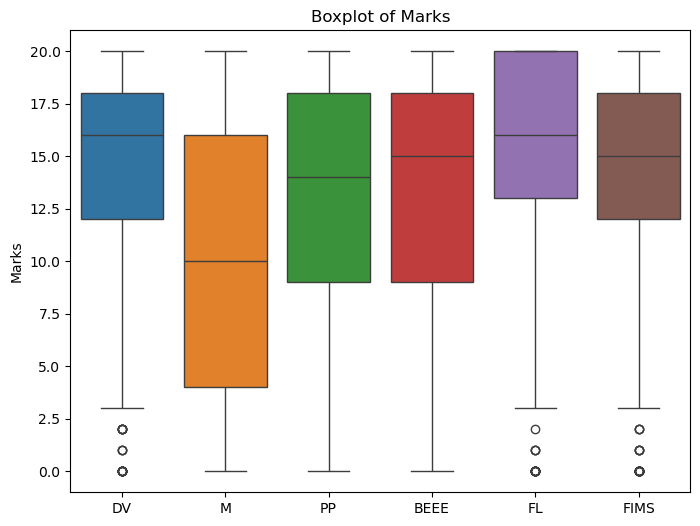

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[subject_columns])
plt.title("Boxplot of Marks")
plt.ylabel("Marks")
plt.show()


The boxplot visualizes the distribution of marks across different subjects, highlighting medians, quartiles, spread, and potential outliers in student performance.

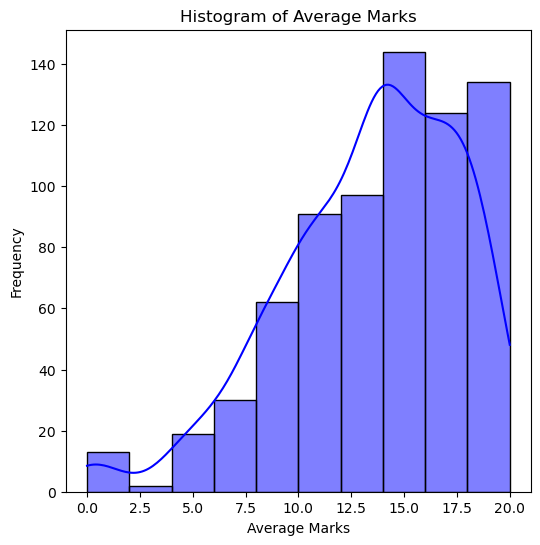

In [5]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Average'], kde=True, color='blue', bins=10)
plt.title("Histogram of Average Marks")
plt.xlabel("Average Marks")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of students' average marks, with a KDE curve highlighting trends. It helps identify common score ranges, peak frequencies, and variations, providing insights into overall student performance patterns.

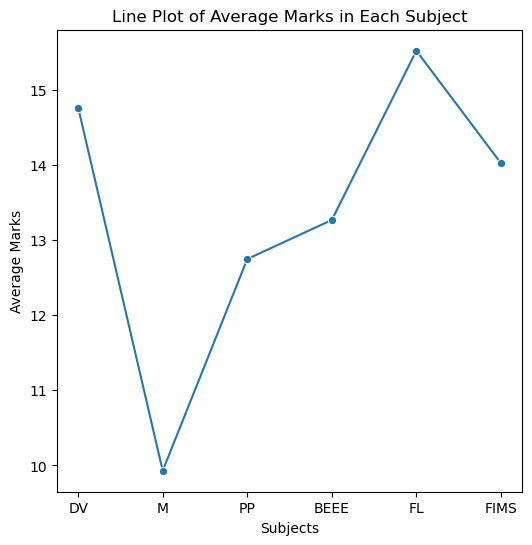

In [6]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=df[subject_columns].mean(), marker='o')
plt.title("Line Plot of Average Marks in Each Subject")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.show()


The line plot visualizes the average marks in each subject, showing performance trends. It helps identify subjects where students score higher or lower, highlighting variations and potential areas for improvement.

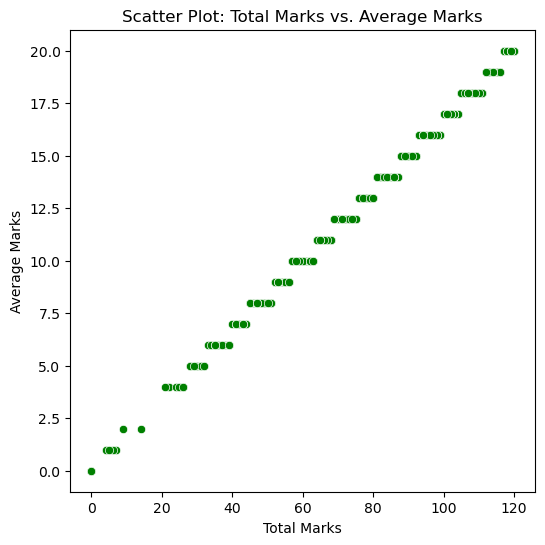

In [7]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Total', y='Average', data=df, color='green')
plt.title("Scatter Plot: Total Marks vs. Average Marks")
plt.xlabel("Total Marks")
plt.ylabel("Average Marks")
plt.show()


The scatter plot visualizes the relationship between total marks and average marks, helping identify trends, correlations, and variations in student performance across different subjects.

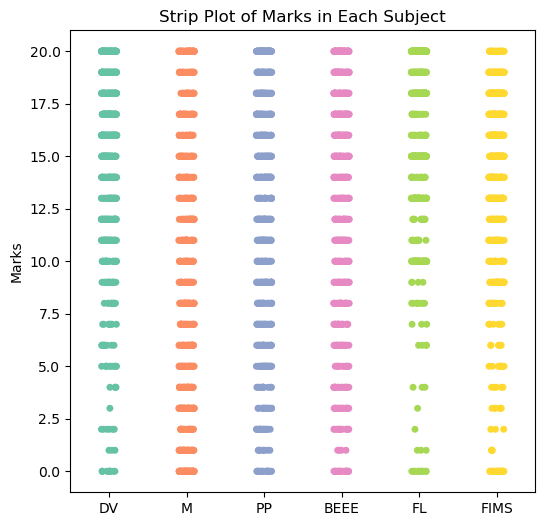

In [8]:
plt.figure(figsize=(6, 6))
sns.stripplot(data=df[subject_columns], jitter=True, palette="Set2")
plt.title("Strip Plot of Marks in Each Subject")
plt.ylabel("Marks")
plt.show()

The strip plot displays the distribution of marks in each subject, showing individual data points with slight jitter to prevent overlap, helping visualize concentration and variability in student performance.

Text(0, 0.5, 'Frequency')

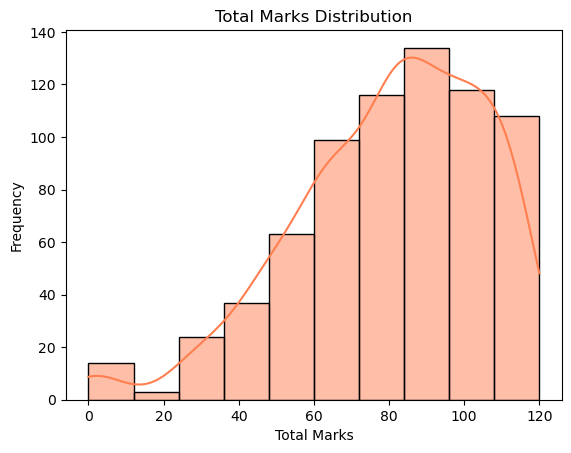

In [9]:
fig =  figsize=(15, 6)
sns.histplot(df['Total'], kde=True, color='coral', bins=10)
plt.title("Total Marks Distribution")
plt.xlabel("Total Marks")
plt.ylabel("Frequency")

The histogram visualizes the distribution of total marks, showing how frequently different score ranges appear. The KDE curve highlights trends, helping identify common performance levels and variations in student marks.

In [10]:
subject_columns = ['DV', 'M', 'PP', 'BEEE', 'FL', 'FIMS']
df[subject_columns] = df[subject_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df['Total'] = df[subject_columns].sum(axis=1).astype(int)
df['Average'] = (df['Total'] / 6).round().astype(int)
def calculate_grade(Total):
    if Total >= 110:
        return "A+"
    elif Total >= 100:
        return "A"
    elif Total >= 80:
        return "B"
    elif Total >= 65:
        return "C"
    elif Total >= 45:
        return "D"
    else:
        return "F"

df['Grade'] = df['Total'].apply(calculate_grade)
print(df)



    SECTION  DV   M  PP  BEEE  FL  FIMS  Total  Average Grade
0     ALPHA  12   0  17     9  19    15     72       12     C
1     ALPHA  19  12  16    16  18     3     84       14     B
2     ALPHA  18  14  18    18  18    16    102       17     A
3     ALPHA  15   9  19    17  19    15     94       16     B
4     ALPHA  18  17  19    19  20    18    111       18    A+
..      ...  ..  ..  ..   ...  ..   ...    ...      ...   ...
712    ZETA  15  10   7    18  18    16     84       14     B
713    ZETA  19   8   8    19  17    18     89       15     B
714    ZETA  12   1   7    10  20     8     58       10     D
715    ZETA  17   6  14    14  17    18     86       14     B
716    ZETA  12   1   6     7  15    12     53        9     D

[716 rows x 10 columns]


This code calculates total and average marks for students, assigns grades based on a defined scale, and ensures subject scores are numeric. It then prints the updated DataFrame with total, average, and grade columns.

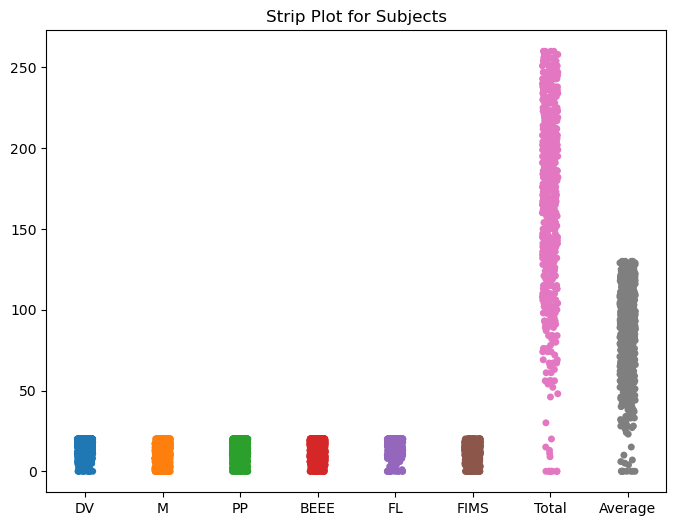

In [11]:

subject_columns = df.select_dtypes(include=['number']).columns

df['Total'] = df[subject_columns].sum(axis=1).astype(int)

df['Average'] = (df['Total'] / 2).astype(int)
plt.figure(figsize=(8, 6))
sns.stripplot(data=df[subject_columns], jitter=True)
plt.title('Strip Plot for Subjects')
plt.show()


The strip plot visualizes individual student marks across subjects, showing distribution patterns. Jitter prevents overlap, helping identify concentration areas, variations, and trends in student performance.

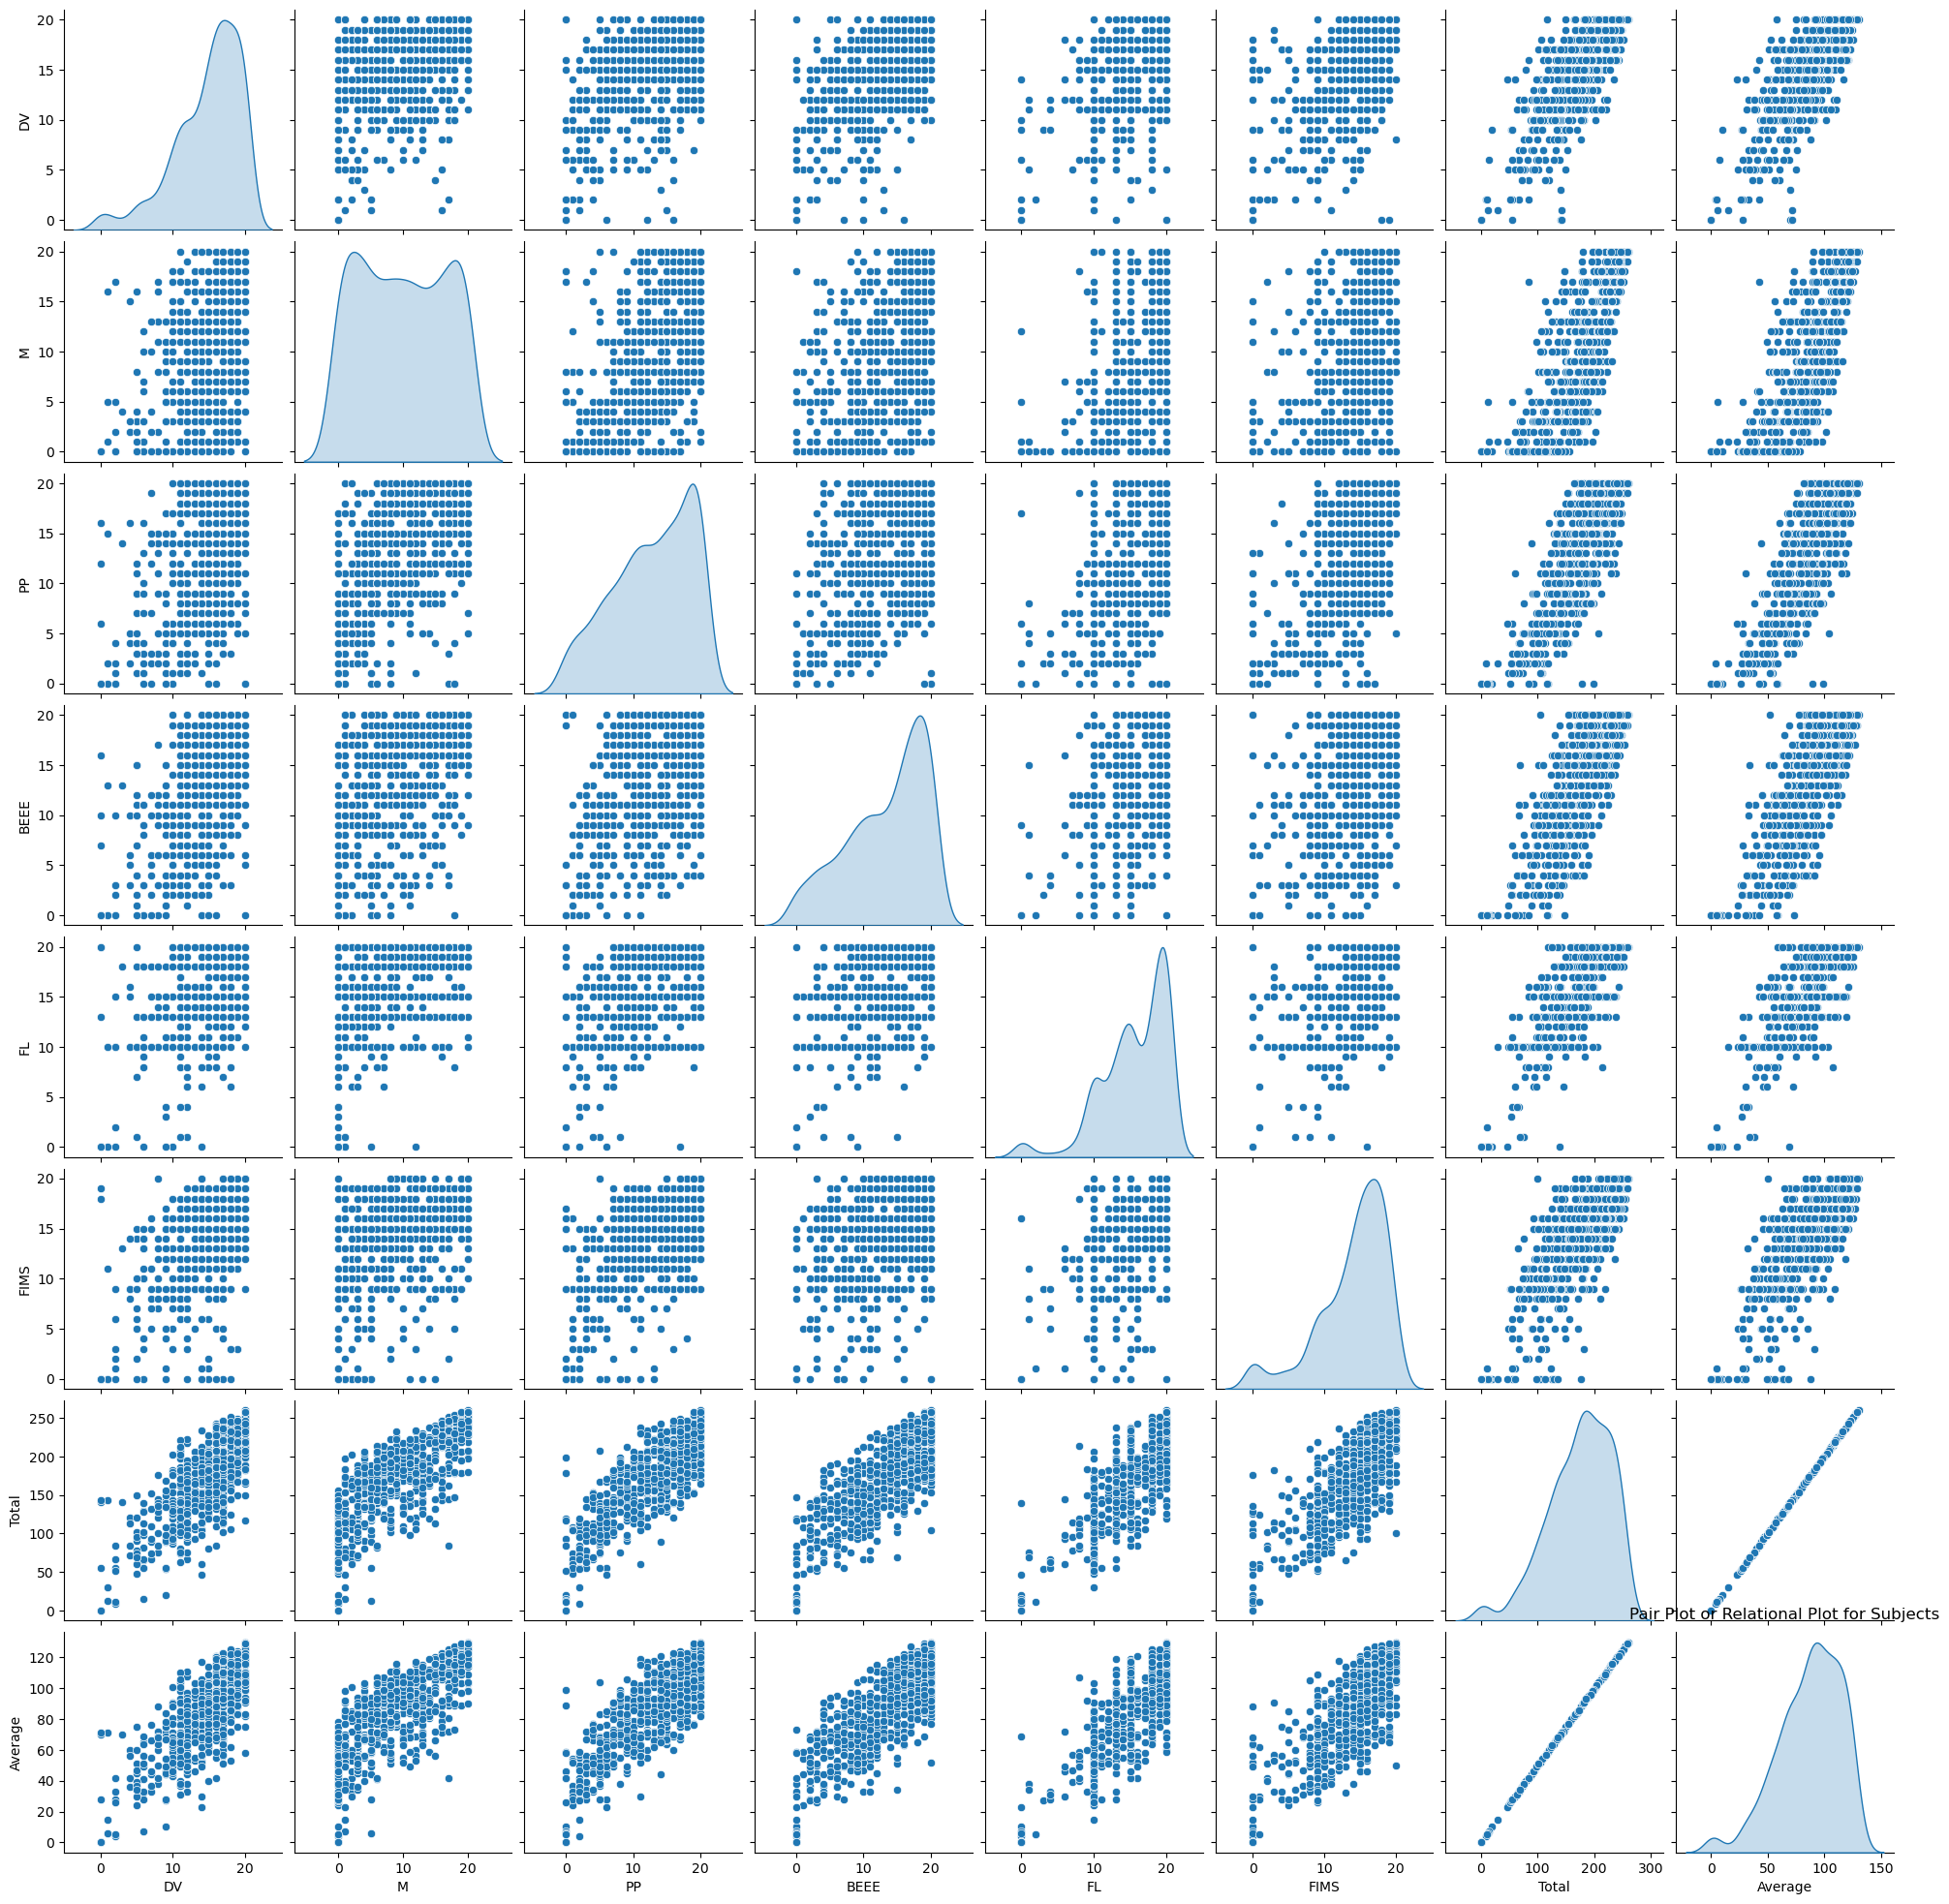

In [12]:
sns.pairplot(data=df[subject_columns], diag_kind='kde')
figsize=(6,8)
plt.title('Pair Plot or Relational Plot for Subjects', y=1.02)
plt.show()

This code generates a pair plot to visualize relationships between numeric subject columns, using KDE (Kernel Density Estimation) for diagonal plots.

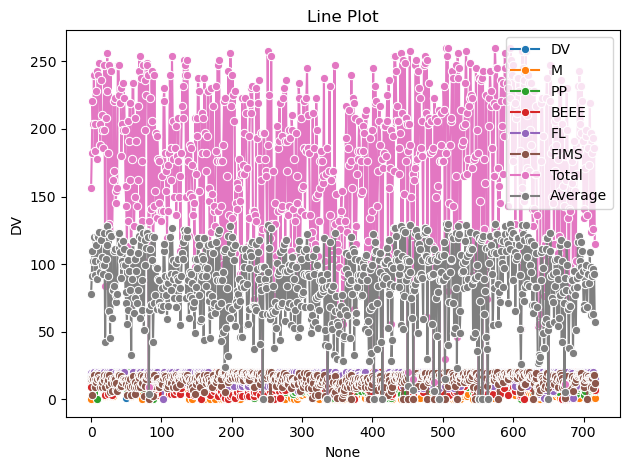

In [13]:
fig=figsize=(16, 12)
for subject in subject_columns:
    sns.lineplot(data=df, x=df.index, y=subject, label=subject, marker='o')
plt.title('Line Plot')
# # legend(title='Subjects')
# sns.histplot(data=df, x='Total', bins=10, kde=True, ax=axs[1, 1])
# plt.title('Histogram Plot')
plt.tight_layout()
plt.show()

This code creates a 2x2 subplot, plotting a line chart for subject-wise marks  and a histogram for total marks distribution. It adjusts layout and displays the plots.

In [14]:
(df['PP']).value_counts()

PP
20    106
19     50
17     46
11     46
15     44
14     44
18     43
12     41
9      38
16     36
5      27
10     26
6      25
7      24
8      24
0      21
13     20
2      17
3      16
4      13
1       9
Name: count, dtype: int64

This counts the occurrences of each unique value in the 'PP' column of the DataFrame df and returns a sorted list.

In [15]:
df['backlogs'] = ((df['DV'] < 10).astype(int) +
                 (df['M'] < 10).astype(int) +
                 (df['PP'] < 10).astype(int) +
                 (df['BEEE'] < 10).astype(int) +
                 (df['FL'] < 10).astype(int) +
                 (df['FIMS'] < 10).astype(int))  
df

,SECTION,DV,M,PP,BEEE,FL,FIMS,Total,Average,Grade,backlogs
0,ALPHA,12,0,17,9,19,15,156,78,C,2
1,ALPHA,19,12,16,16,18,3,182,91,B,1
2,ALPHA,18,14,18,18,18,16,221,110,A,0
3,ALPHA,15,9,19,17,19,15,204,102,B,1
4,ALPHA,18,17,19,19,20,18,240,120,A+,0
...,...,...,...,...,...,...,...,...,...,...,...
712,ZETA,15,10,7,18,18,16,182,91,B,1
713,ZETA,19,8,8,19,17,18,193,96,B,2
714,ZETA,12,1,7,10,20,8,126,63,D,3
715,ZETA,17,6,14,14,17,18,186,93,B,1


code creates a 'backlogs' column in the DataFrame, counting subjects where marks are less than 10. It checks each subject, converts the condition to 1 or 0 , sums them up for each student, and stores the result.

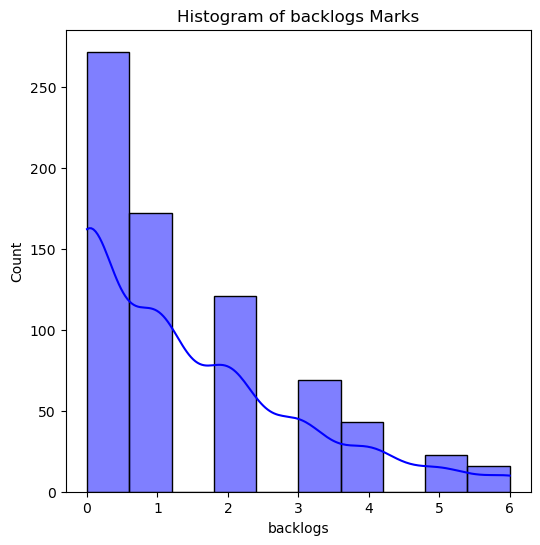

In [16]:
plt.figure(figsize=(6, 6))
sns.histplot(df['backlogs'], kde=True, color='blue', bins=10)
plt.title("Histogram of backlogs Marks")
plt.show()

The histogram displays the distribution of backlog marks, showing frequency across different ranges. The KDE curve highlights trends, helping analyze common backlog levels and variations among students.

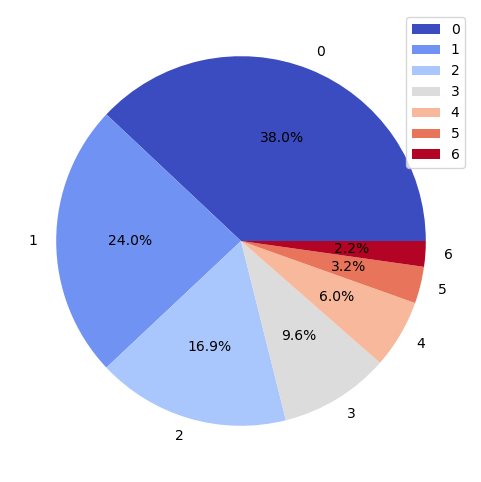

In [17]:
plt.figure(figsize=(6, 6))
df['backlogs'].value_counts().plot.pie(autopct='%1.1f%%', cmap='coolwarm', legend=True)
plt.ylabel("")
plt.show()


The pie chart visualizes the distribution of backlogs among students, showing the percentage of different backlog counts, helping analyze the prevalence and frequency of backlogs in the dataset.

In [18]:
subject_columns = ['DV', 'M', 'PP', 'BEEE', 'FL', 'FIMS']
df[subject_columns] = df[subject_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df['Total'] = df[subject_columns].sum(axis=1).astype(int)
df['Average'] = (df['Total'] / 6).round().astype(int)
def calculate_grade(PP):
    if PP >= 18:
        return "Very Good"
    elif PP >= 15:
        return "Good"
    elif PP >= 11:
        return "Average"
    elif PP <= 10:
        return "Poor"
df['Programming pp'] = df['PP'].apply(calculate_grade)
print(df)



    SECTION  DV   M  PP  BEEE  FL  FIMS  Total  Average Grade  backlogs  \
0     ALPHA  12   0  17     9  19    15     72       12     C         2   
1     ALPHA  19  12  16    16  18     3     84       14     B         1   
2     ALPHA  18  14  18    18  18    16    102       17     A         0   
3     ALPHA  15   9  19    17  19    15     94       16     B         1   
4     ALPHA  18  17  19    19  20    18    111       18    A+         0   
..      ...  ..  ..  ..   ...  ..   ...    ...      ...   ...       ...   
712    ZETA  15  10   7    18  18    16     84       14     B         1   
713    ZETA  19   8   8    19  17    18     89       15     B         2   
714    ZETA  12   1   7    10  20     8     58       10     D         3   
715    ZETA  17   6  14    14  17    18     86       14     B         1   
716    ZETA  12   1   6     7  15    12     53        9     D         3   

    Programming pp  
0             Good  
1             Good  
2        Very Good  
3        Very G

code processes subject marks, calculates total and average marks, and assigns a performance category based on PP scores. It then prints the updated DataFrame.

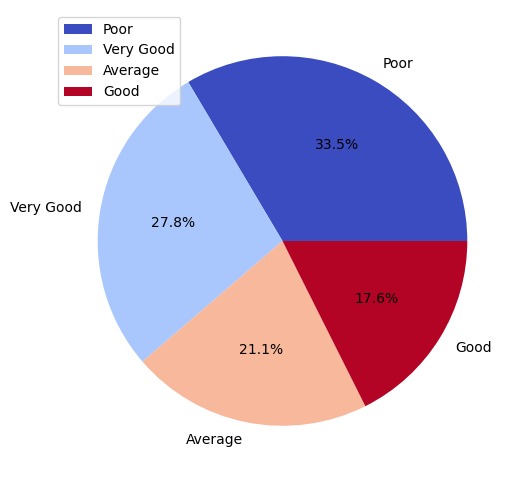

In [19]:
plt.figure(figsize=(6, 6))
df['Programming pp'].value_counts().plot.pie(autopct='%1.1f%%', cmap='coolwarm', legend=True)
plt.ylabel("")
plt.show()


The pie chart represents the distribution of students' performance in "Programming pp," showing the percentage of different score categories and helping analyze overall trends in programming proficiency.

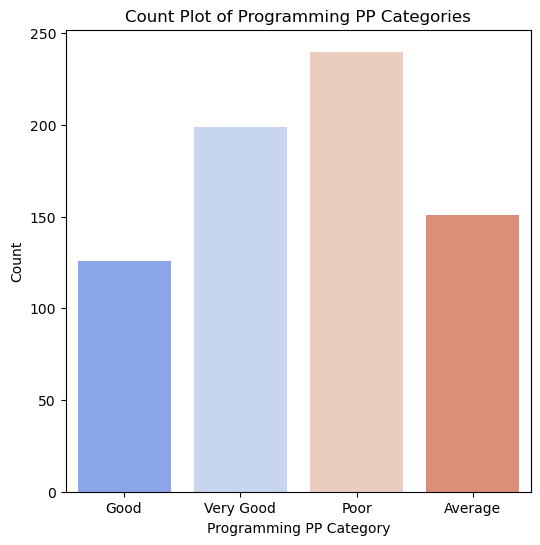

In [20]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Programming pp'], palette='coolwarm')
plt.title("Count Plot of Programming PP Categories")
plt.xlabel("Programming PP Category")
plt.ylabel("Count")
plt.show()

The count plot visualizes the distribution of different "Programming PP" categories, showing the number of students in each category, helping analyze trends and performance levels in programming proficiency.

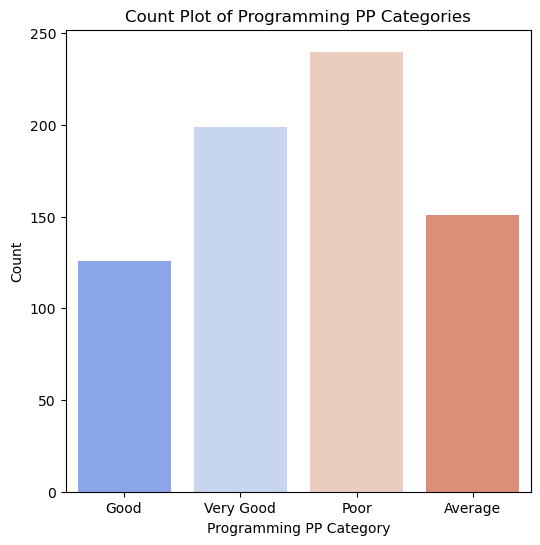

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Programming pp'], palette='coolwarm')
plt.title("Count Plot of Programming PP Categories")
plt.xlabel("Programming PP Category")
plt.ylabel("Count")
plt.show()

Your code has an issue because 'Programming pp' is a categorical column, and sns.histplot() is meant for numerical data.

In [22]:
df['Programming pp'].value_counts()

Programming pp
Poor         240
Very Good    199
Average      151
Good         126
Name: count, dtype: int64

This command counts and returns the occurrences of each unique category in the 'Programming pp' column, showing how many students fall into each performance category.

In [23]:

subject_columns = ['DV', 'M', 'PP', 'BEEE', 'FL', 'FIMS']
df[subject_columns] = df[subject_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df['Total'] = df[subject_columns].sum(axis=1).astype(int)
df['Average'] = (df['Total'] / 6).round().astype(int)
def calculate_grade(DV):
    if DV >= 18:
        return "Very Good"
    elif DV >= 15:
        return "Good"
    elif DV >= 11:
        return "Average"
    elif DV <= 10:
        return "Poor"
df['Data analysis'] = df['DV'].apply(calculate_grade)
print(df)



    SECTION  DV   M  PP  BEEE  FL  FIMS  Total  Average Grade  backlogs  \
0     ALPHA  12   0  17     9  19    15     72       12     C         2   
1     ALPHA  19  12  16    16  18     3     84       14     B         1   
2     ALPHA  18  14  18    18  18    16    102       17     A         0   
3     ALPHA  15   9  19    17  19    15     94       16     B         1   
4     ALPHA  18  17  19    19  20    18    111       18    A+         0   
..      ...  ..  ..  ..   ...  ..   ...    ...      ...   ...       ...   
712    ZETA  15  10   7    18  18    16     84       14     B         1   
713    ZETA  19   8   8    19  17    18     89       15     B         2   
714    ZETA  12   1   7    10  20     8     58       10     D         3   
715    ZETA  17   6  14    14  17    18     86       14     B         1   
716    ZETA  12   1   6     7  15    12     53        9     D         3   

    Programming pp Data analysis  
0             Good       Average  
1             Good     Very G

This code processes subject marks, calculates total and average marks, and assigns a performance category based on DV (Data Analysis) scores. It then prints the updated DataFrame.

In [24]:
df['Data analysis'].value_counts()

Data analysis
Very Good    231
Good         216
Average      155
Poor         114
Name: count, dtype: int64

counts and returns the occurrences of each unique category in the 'Data analysis' column, showing how many students fall into each performance category.

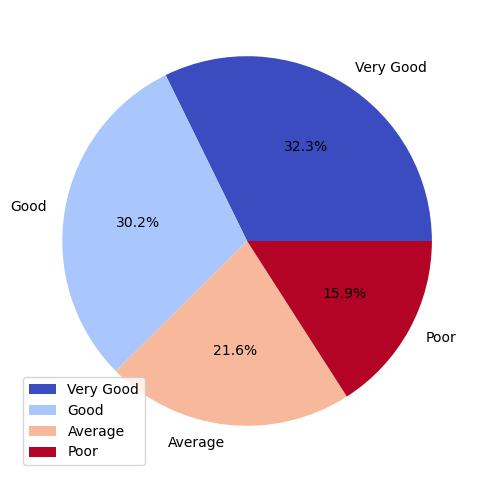

In [25]:
plt.figure(figsize=(6, 6))
df['Data analysis'].value_counts().plot.pie(autopct='%1.1f%%', cmap='coolwarm', legend=True)
plt.ylabel("")
plt.show()


This code creates a pie chart to show the percentage distribution of Data Analysis categories, using a coolwarm color map, percentage labels, and a legend for clarity

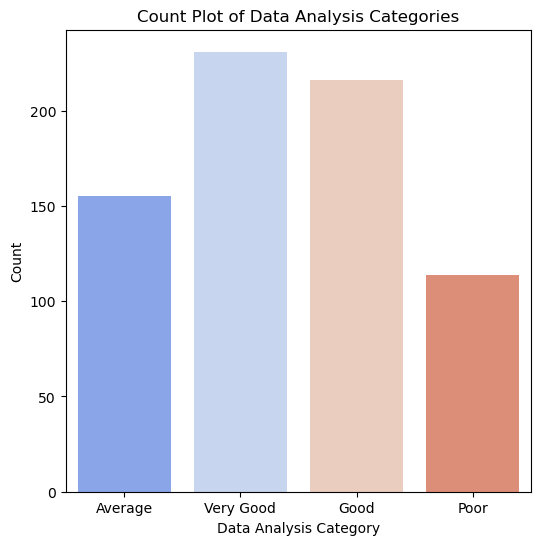

In [26]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Data analysis'], palette='coolwarm')
plt.title("Count Plot of Data Analysis Categories")
plt.xlabel("Data Analysis Category")
plt.ylabel("Count")
plt.show()


code creates a count plot to visualize the number of students in each Data Analysis category, using a coolwarm color palette for better readability.

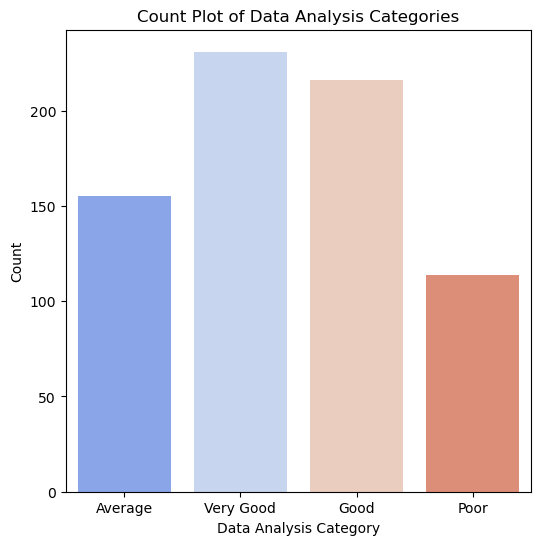

In [27]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Data analysis'], palette='coolwarm')
plt.title("Count Plot of Data Analysis Categories")
plt.xlabel("Data Analysis Category")
plt.ylabel("Count")
plt.show()


code creates a count plot to display the number of students in each Data Analysis category.

In [28]:

filtered_data = df[(df.iloc[:, 1:] == 20).any(axis=1)]
filtered_data

,SECTION,DV,M,PP,BEEE,FL,FIMS,Total,Average,Grade,backlogs,Programming pp,Data analysis
4,ALPHA,18,17,19,19,20,18,111,18,A+,0,Very Good,Very Good
6,ALPHA,15,10,20,20,15,14,94,16,B,0,Very Good,Good
7,ALPHA,17,17,19,20,19,13,105,18,A,0,Very Good,Good
8,ALPHA,10,18,0,20,19,15,82,14,B,1,Poor,Poor
9,ALPHA,18,19,20,20,20,15,112,19,A+,0,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,ZETA,16,6,15,17,20,16,90,15,B,1,Good,Good
705,ZETA,16,0,11,16,20,0,63,10,D,2,Average,Good
709,ZETA,19,17,12,17,20,16,101,17,A,0,Average,Very Good
711,ZETA,18,9,12,20,16,16,91,15,B,1,Average,Very Good


This code filters the DataFrame (df) to include only rows where at least one column has a value of 20. The filtered results are then displayed.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 716
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SECTION         716 non-null    object
 1   DV              716 non-null    int32 
 2   M               716 non-null    int32 
 3   PP              716 non-null    int32 
 4   BEEE            716 non-null    int32 
 5   FL              716 non-null    int32 
 6   FIMS            716 non-null    int32 
 7   Total           716 non-null    int32 
 8   Average         716 non-null    int32 
 9   Grade           716 non-null    object
 10  backlogs        716 non-null    int32 
 11  Programming pp  716 non-null    object
 12  Data analysis   716 non-null    object
dtypes: int32(9), object(4)
memory usage: 53.1+ KB


In [30]:
df['SECTION']=df['SECTION'].fillna('SIGMA')
df['SECTION']=df['SECTION'].replace('','SIGMA')
df

,SECTION,DV,M,PP,BEEE,FL,FIMS,Total,Average,Grade,backlogs,Programming pp,Data analysis
0,ALPHA,12,0,17,9,19,15,72,12,C,2,Good,Average
1,ALPHA,19,12,16,16,18,3,84,14,B,1,Good,Very Good
2,ALPHA,18,14,18,18,18,16,102,17,A,0,Very Good,Very Good
3,ALPHA,15,9,19,17,19,15,94,16,B,1,Very Good,Good
4,ALPHA,18,17,19,19,20,18,111,18,A+,0,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,ZETA,15,10,7,18,18,16,84,14,B,1,Poor,Good
713,ZETA,19,8,8,19,17,18,89,15,B,2,Poor,Very Good
714,ZETA,12,1,7,10,20,8,58,10,D,3,Poor,Average
715,ZETA,17,6,14,14,17,18,86,14,B,1,Average,Good


In [31]:
df[df['SECTION']=='ALPHA']['DV']

0     12
1     19
2     18
3     15
4     18
      ..
85     3
86    17
87    13
88     2
89    10
Name: DV, Length: 90, dtype: int32

In [32]:
df=df.fillna(0)
df=df.replace("AB",-1)
df=df.replace("A",-1)
df=df.replace("MP",-2)
df

,SECTION,DV,M,PP,BEEE,FL,FIMS,Total,Average,Grade,backlogs,Programming pp,Data analysis
0,ALPHA,12,0,17,9,19,15,72,12,C,2,Good,Average
1,ALPHA,19,12,16,16,18,3,84,14,B,1,Good,Very Good
2,ALPHA,18,14,18,18,18,16,102,17,-1,0,Very Good,Very Good
3,ALPHA,15,9,19,17,19,15,94,16,B,1,Very Good,Good
4,ALPHA,18,17,19,19,20,18,111,18,A+,0,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,ZETA,15,10,7,18,18,16,84,14,B,1,Poor,Good
713,ZETA,19,8,8,19,17,18,89,15,B,2,Poor,Very Good
714,ZETA,12,1,7,10,20,8,58,10,D,3,Poor,Average
715,ZETA,17,6,14,14,17,18,86,14,B,1,Average,Good


In [33]:
d=df.groupby(['SECTION']).mean(numeric_only=True)
d

,DV,M,PP,BEEE,FL,FIMS,Total,Average,backlogs
SECTION,,,,,,,,,
0,16.423077,13.230769,14.807692,13.115385,15.692308,16.692308,89.961538,14.923077,0.846154
ALPHA,13.411111,13.711111,15.933333,15.622222,16.177778,12.700000,87.555556,14.577778,0.866667
BETA,13.000000,12.122222,15.966667,10.855556,15.977778,14.044444,81.966667,13.700000,1.144444
DELTA,13.866667,9.500000,12.422222,9.455556,14.555556,16.577778,76.377778,12.744444,1.533333
EPSILON,15.215909,6.693182,8.568182,14.431818,15.318182,12.068182,72.295455,12.022727,1.863636
GAMMA,14.811111,9.288889,10.777778,14.788889,15.633333,12.433333,77.733333,12.977778,1.500000
OMEGA,16.555556,8.266667,14.611111,13.522222,15.633333,15.100000,83.688889,13.988889,1.377778
SIGMA,15.888889,12.444444,14.301587,13.047619,16.063492,15.206349,86.952381,14.523810,1.047619
ZETA,15.213483,7.112360,9.123596,14.415730,14.876404,13.573034,74.314607,12.415730,1.955056


In [34]:
d=df.groupby(['SECTION']).std(numeric_only=True)
d

,DV,M,PP,BEEE,FL,FIMS,Total,Average,backlogs
SECTION,,,,,,,,,
0,4.319010,7.185027,4.560870,5.637921,3.319870,3.728477,23.563498,3.928593,1.222859
ALPHA,4.991891,5.595432,5.343903,4.803037,3.808854,4.498314,23.435357,3.949051,1.317130
BETA,3.815992,5.517750,4.251768,5.146311,3.818870,3.200811,18.773906,3.102916,1.213789
DELTA,4.308862,6.385113,5.634919,5.694786,4.143795,3.798219,24.909985,4.169340,1.454941
EPSILON,3.295587,6.010256,4.309293,4.949853,4.216948,4.745949,22.677732,3.775229,1.486969
GAMMA,4.998639,6.258916,5.694030,5.854979,3.913245,4.709660,26.713966,4.509610,1.717393
OMEGA,5.097060,6.375515,5.906946,6.179393,5.514944,5.081471,29.013613,4.819190,1.590546
SIGMA,5.236692,6.712477,5.963964,5.914522,4.872149,5.477693,30.186212,5.015644,1.669736
ZETA,3.877300,6.245795,4.193665,5.282495,5.702512,4.636534,24.707652,4.152789,1.678136


In [35]:
d=df.groupby(['SECTION']).var(numeric_only=True)
d

,DV,M,PP,BEEE,FL,FIMS,Total,Average,backlogs
SECTION,,,,,,,,,
0,18.653846,51.624615,20.801538,31.786154,11.021538,13.901538,555.238462,15.433846,1.495385
ALPHA,24.918976,31.308864,28.557303,23.069164,14.507366,20.234831,549.215980,15.595006,1.734831
BETA,14.561798,30.445568,18.077528,26.484519,14.583770,10.245194,352.459551,9.628090,1.473283
DELTA,18.566292,40.769663,31.752310,32.430587,17.171036,14.426467,620.507366,17.383396,2.116854
EPSILON,10.860893,36.123171,18.570010,24.501045,17.782654,22.524033,514.279519,14.252351,2.211076
GAMMA,24.986392,39.174032,32.421973,34.280774,15.313483,22.180899,713.635955,20.336579,2.949438
OMEGA,25.980025,40.647191,34.892010,38.184894,30.414607,25.821348,841.789763,23.224594,2.529838
SIGMA,27.422939,45.057348,35.568868,34.981567,23.737839,30.005120,911.207373,25.156682,2.788018
ZETA,15.033453,39.009959,17.586823,27.904750,32.518641,21.497446,610.468080,17.245659,2.816139


In [36]:
df[df['SECTION']=='ALPHA'].DV.mean()

13.411111111111111

In [37]:
import scipy.stats as stats

In [38]:
from scipy import stats
t_stat, p_val = stats.ttest_1samp(df[df['SECTION'] == 'ALPHA']['DV'], popmean=13.411)
print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("The sample mean is significantly different from 13.411 (Reject H0).")
else:
    print("The sample mean is NOT significantly different from 13.411 (Fail to reject H0).")

T-statistic: 0.00021116096932373584
P-value: 0.9998319905142534
The sample mean is NOT significantly different from 13.411 (Fail to reject H0).


In [39]:
df[df['SECTION']=='BETA'].DV.mean()

13.0

In [40]:
from scipy import stats
t_stat, p_val = stats.ttest_rel(df[df['SECTION'] == 'ALPHA']['DV'], df[df['SECTION'] == 'BETA']['DV'])
alpha = 0.05
print("T-statistic:", t_stat) 
print("P-value:", p_val)
if p_val < alpha:
    print("There is a significant difference between ALPHA and BETA (Reject H0).")
else:
    print("There is NO significant difference between ALPHA and BETA (Fail to reject H0).")

T-statistic: 0.6677896583545824
P-value: 0.5059958752914141
There is NO significant difference between ALPHA and BETA (Fail to reject H0).


In [41]:
from scipy.stats import ttest_ind
alpha_dv = df[df['SECTION'] == 'ALPHA']['DV']
beta_dv = df[df['SECTION'] == 'BETA']['DV']
t_stat, p_value = ttest_ind(alpha_dv, beta_dv)
alpha = 0.05
print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < alpha:
    print("The difference is statistically significant (Reject H0).")
else:
    print("The difference is NOT statistically significant (Fail to reject H0).")


T-statistic: 0.6207084248259586
P-value: 0.5355854399866022
The difference is NOT statistically significant (Fail to reject H0).


In [42]:
import pandas as pd
import scipy.stats as stats
contingency_table = pd.crosstab(df['SECTION'], df['PP'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
alpha = 0.05
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)
if p_val < alpha:
    print("There is a significant association between SECTION and DV (Reject H0).")
else:
    print("There is NO significant association between SECTION and DV (Fail to reject H0).")


Chi-Square Statistic: 396.9483707550666
P-value: 3.88001282354212e-22
Degrees of Freedom: 160
Expected Frequencies Table:
 [[ 0.76256983  0.32681564  0.61731844  0.58100559  0.47206704  0.98044693
   0.90782123  0.87150838  0.87150838  1.37988827  0.94413408  1.67039106
   1.48882682  0.72625698  1.59776536  1.59776536  1.30726257  1.67039106
   1.56145251  1.81564246  3.84916201]
 [ 2.6396648   1.13128492  2.13687151  2.01117318  1.63407821  3.39385475
   3.1424581   3.01675978  3.01675978  4.77653631  3.26815642  5.78212291
   5.15363128  2.51396648  5.53072626  5.53072626  4.52513966  5.78212291
   5.40502793  6.2849162  13.32402235]
 [ 2.6396648   1.13128492  2.13687151  2.01117318  1.63407821  3.39385475
   3.1424581   3.01675978  3.01675978  4.77653631  3.26815642  5.78212291
   5.15363128  2.51396648  5.53072626  5.53072626  4.52513966  5.78212291
   5.40502793  6.2849162  13.32402235]
 [ 2.6396648   1.13128492  2.13687151  2.01117318  1.63407821  3.39385475
   3.1424581   3.016